In [33]:
install.packages("igraph")

library('igraph')
library('Matrix')
#library('pracma')


The downloaded binary packages are in
	/var/folders/c3/2kdggff56355gcbdklm74dc40000gn/T//RtmpKQboel/downloaded_packages


In [4]:
g1 <- erdos.renyi.game(1000, 0.003, directed=F)
g2 <- erdos.renyi.game(1000, 0.004, directed=F)
g3 <- erdos.renyi.game(1000, 0.01, directed=F)
g4 <- erdos.renyi.game(1000, 0.05, directed=F)
g5 <- erdos.renyi.game(1000, 0.1, directed=F)

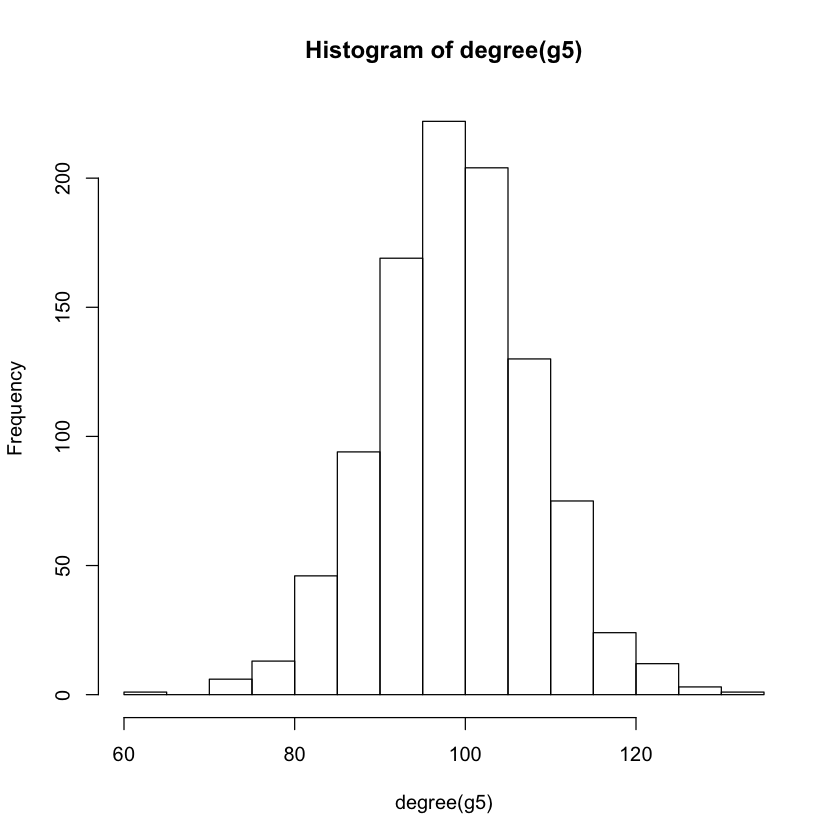

In [10]:
hist(degree(g5))

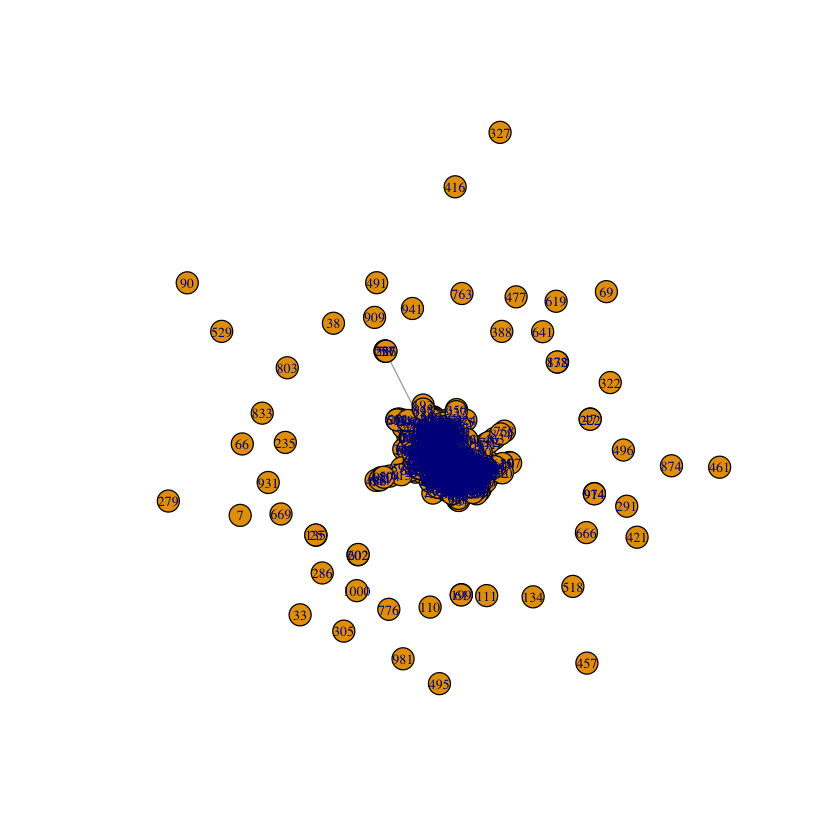

In [14]:
#layout <-layout.fruchterman.reingold(g1)
plot(g1,vertex.size=8, vertex.label.cex=0.7)

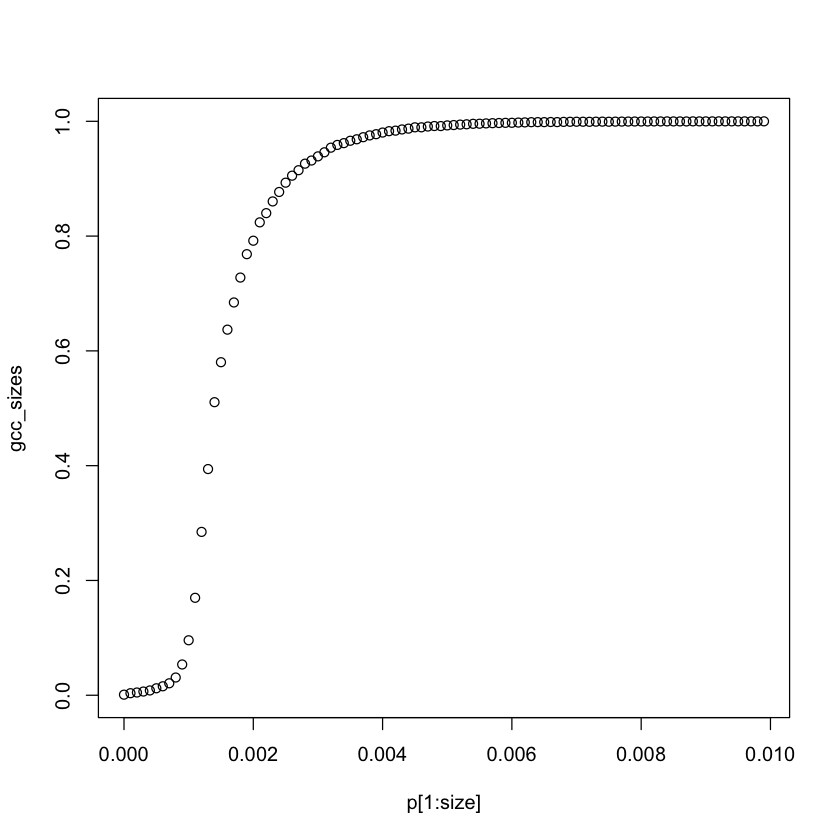

In [49]:
p_ref <- log(1000)/1000
size <- 100;
trials <- 100;
gcc_sizes <- numeric(size)
p_min <- 0
p_max <- 0.01
p <- seq(p_min, p_max, (p_max - p_min) / size)

for ( i in 1:size ) {
    for ( j in 1:trials ) {
        g <- erdos.renyi.game(1000, p[i], directed=F)
    
        #find GCC
        g.components <- clusters(g)
        #print(g.components$csize)
        # which is the largest component
        ix <- which.max(g.components$csize)
        # get the subgraph correspondent to just the giant component
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))


        gcc_sizes[i] <- gcc_sizes[i] + max(g.components$csize) / 1000
    }
    gcc_sizes[i] <- gcc_sizes[i] / trials
}

plot(p[1:size], gcc_sizes)

[1] 0.0050 0.0052 0.0054 0.0056 0.0058 0.0060 0.0062 0.0064 0.0066 0.0068
[11] 0.0070 0.0072 0.0074 0.0076 0.0078 0.0080 0.0082 0.0084 0.0086 0.0088
[21] 0.0090

In [32]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Transition Matrix for an Undirected Network


8 x 8 sparse Matrix of class "dgCMatrix"
                                                                  
[1,] .    1.0000000 .         .         . .         .    .        
[2,] 0.25 .         0.2500000 0.2500000 . 0.2500000 .    .        
[3,] .    0.5000000 .         .         . .         .    0.5000000
[4,] .    0.2500000 .         .         . 0.2500000 0.25 0.2500000
[5,] .    .         .         .         1 .         .    .        
[6,] .    0.3333333 .         0.3333333 . .         .    0.3333333
[7,] .    .         .         1.0000000 . .         .    .        
[8,] .    .         0.3333333 0.3333333 . 0.3333333 .    .        


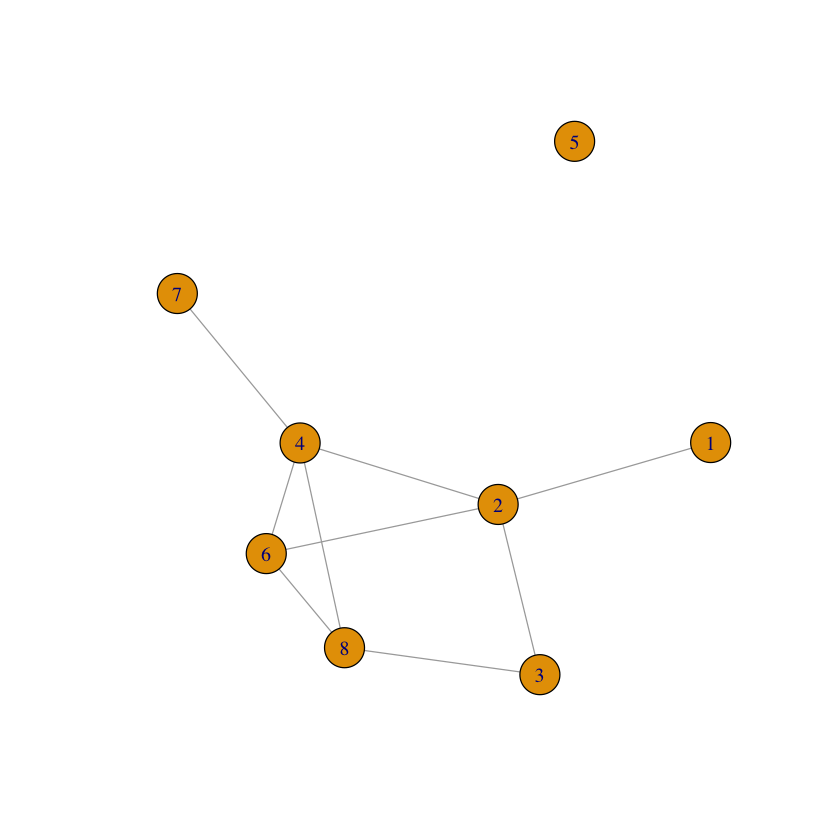

In [33]:
set.seed(0)
g = random.graph.game(8, 0.3)
plot(g)
print(create_transition_matrix(g))

### Transition Matrix for a Directed Network

8 x 8 sparse Matrix of class "dgCMatrix"
                                                                    
[1,] .    .         .    0.5000000 0.5000000 .         .         .  
[2,] 0.20 .         .    .         0.2000000 0.2000000 0.2000000 0.2
[3,] .    0.3333333 .    0.3333333 .         0.3333333 .         .  
[4,] 0.25 .         0.25 .         0.2500000 .         0.2500000 .  
[5,] .    0.5000000 .    .         .         .         .         0.5
[6,] .    0.3333333 .    .         0.3333333 .         0.3333333 .  
[7,] .    .         .    .         .         .         1.0000000 .  
[8,] .    0.2500000 0.25 .         0.2500000 .         0.2500000 .  


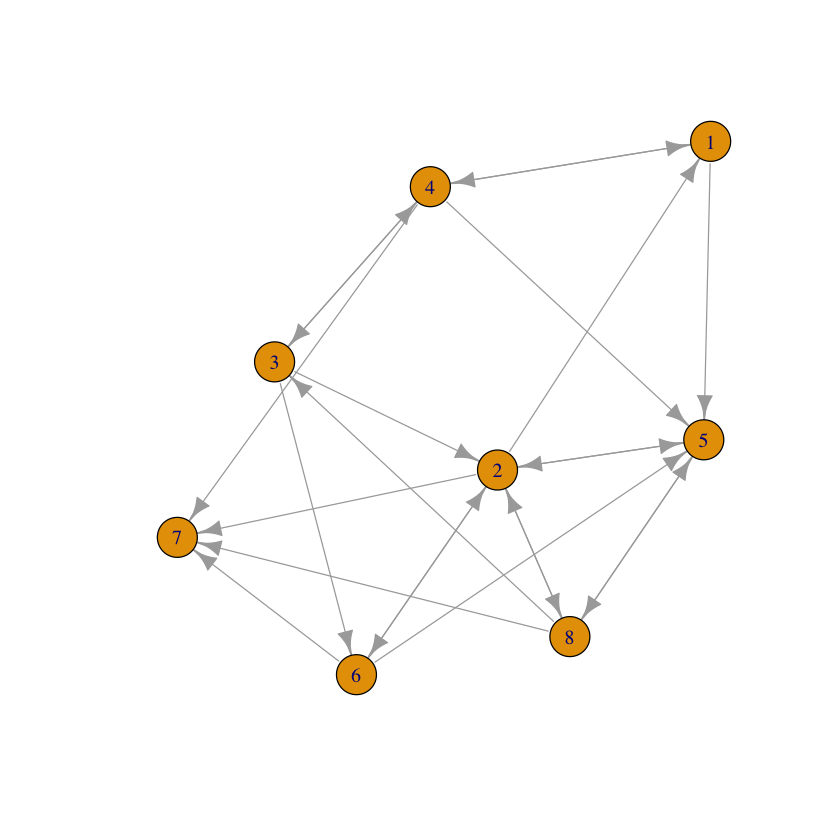

In [34]:
set.seed(1)
g = random.graph.game(8, 0.4, directed = T)
plot(g)
print(create_transition_matrix(g))

In [35]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [37]:
set.seed(1)
v_last = random_walk(g, 15, 1)

Step 1: 1
Step 2: 5
Step 3: 8
Step 4: 2
Step 5: 6
Step 6: 7
Step 7: 7
Step 8: 7
Step 9: 7
Step 10: 7
Step 11: 7
Step 12: 7
Step 13: 7
Step 14: 7
Step 15: 7
